**Cinematic Moral Dilemmas**

Main Jupyter Notebook files with first results of the project. 

**1. Imports**

Python packages are imported here

In [17]:
import sys  
import seaborn as sns  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.colors as mcolors  
import ast    
import json  
sys.path.append('src')    

# Ensure the path to the 'preprocessing' module is correct
from src.preprocessing import *   



**2. Very first exploration**

Let's import some files given in the corpus  

In [18]:
movies = pd.read_csv('../data/MovieSummaries/movie.metadata.tsv', sep='\t', header=None)
characters = pd.read_csv('../data/MovieSummaries/character.metadata.tsv', sep = '\t', header = None)

# Importing txt files
name_clusters = pd.read_csv('../data/MovieSummaries/name.clusters.txt', sep = '\t', header = None)
summaries = pd.read_csv('../data/MovieSummaries/plot_summaries.txt', sep = '\t', header = None)
tv_tropes = pd.read_csv('../data/MovieSummaries/tvtropes.clusters.txt', sep = '\t', header = None)  

First check of the data

In [19]:
movies.sample(5)

,0,1,2,3,4,5,6,7,8
71987,26350895,/m/0bbytp5,Boston Kickout,1996,NaN,107.0,{},"{""/m/07ssc"": ""United Kingdom""}","{""/m/07s9rl0"": ""Drama""}"
11007,13506326,/m/03c7kv0,Hair Show,2004-10-17,305281.0,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01z4y"": ""Comedy"", ""/m/0219x_"": ""Indie""}"
50399,31165263,/m/0gh88fd,Eight on the Lam,1967-04-29,NaN,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
14841,36012783,/m/0jzvc1z,Folly of Love,1928-11-14,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/04306rv"": ""Ger...","{""/m/0345h"": ""Germany""}","{""/m/05p553"": ""Comedy film"", ""/m/06ppq"": ""Sile..."
1816,28465900,/m/0crcypn,Lake Placid 3,2010-08-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01q03"": ""Cult"", ""/m/03npn"": ""Horror""}"


Let's rename the columns according to what is in the README of the dataset.

In [20]:
movies.columns = ['wikipedia_movie_id', 'freebase_movie_id', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
name_clusters.columns = ['name', 'freebase_movie_id']        
summaries.columns = ['wikipedia_movie_id', 'plot_summary']
characters.columns = ['wikipedia_movie_id', 'freebase_movie_id', 'movie_release_date', 'character_name', 'actor_birth', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name', 'actor_age', 'freebase_character_map', 'freebase_character_id', 'freebase_actor_id']

Check unique entries

In [21]:
movies['movie_countries'].unique()  

array(['{"/m/09c7w0": "United States of America"}',
       '{"/m/05b4w": "Norway"}', '{"/m/07ssc": "United Kingdom"}', ...,
       '{"/m/0f8l9c": "France", "/m/06mzp": "Switzerland", "/m/0h3y": "Algeria", "/m/0345h": "Germany"}',
       '{"/m/014tss": "Kingdom of Great Britain", "/m/03_3d": "Japan", "/m/02jx1": "England", "/m/07ssc": "United Kingdom", "/m/0345h": "Germany"}',
       '{"/m/06mzp": "Switzerland", "/m/03rjj": "Italy", "/m/082fr": "West Germany", "/m/03f2w": "German Democratic Republic"}'],
      dtype=object)

In [22]:
print((movies.isna().sum() / movies.shape[0]) * 100)

# in movie_language, movie_genre and movie_countries, we check the percentage of empty lists
print("Percentage of empty languages: ", (movies['movie_languages'].apply(len) == 0).sum() / movies.shape[0] * 100)
print("Percentage of empty genres: ", (movies['movie_genres'].apply(len) == 0).sum() / movies.shape[0] * 100)
print("Percentage of empty countries: ", (movies['movie_countries'].apply(len) == 0).sum() / movies.shape[0] * 100)

wikipedia_movie_id           0.000000
freebase_movie_id            0.000000
movie_name                   0.000000
movie_release_date           8.443743
movie_box_office_revenue    89.722416
movie_runtime               25.018045
movie_languages              0.000000
movie_countries              0.000000
movie_genres                 0.000000
dtype: float64
Percentage of empty languages:  0.0
Percentage of empty genres:  0.0
Percentage of empty countries:  0.0


How many movies are in the dataset ?  

In [ ]:
len(movies)  

81741

Noticing here that there are almost 90% of movies that do not have revenue in the CMU movie dataset, this is an issue for our project, as we want to investigate how different plot structures and narrative formulas affect a movie’s box office success. An other dataset will be used to get this information. 

The new dataset will be composed of much less movies, but still, it is sufficient to conduct a concrete analysis of influence of plot summaries on rentability of movies.    

**3. Preprocessing Part Explanations (Arthur)**

**EXPLAIN HOW THE PREPROCESSING WORKS**  
 
**Merge with IMDb**  

**Scraping IMDb website**  

**Faire des passes passes entre ce file et l'autre**

**4. Visualisations after preprocessing**

Loading the two clean CSV files after preprocessing so that clean data is used for first analyses. There are composed of less movies, but their distributions is sufficient for the purpose of the project, and this avoid taking to much time to run the scraping on IMDb website and word analysis on the plot summaries.    

In [24]:
movies = pd.read_csv('/Users/svenhominal/Desktop/ADA/ADA10112024/data/processed/merged_movies.csv', sep=',')   
summaries_preprocessed = pd.read_csv('/Users/svenhominal/Desktop/ADA/ADA10112024/data/processed/summaries_preprocessed.csv', sep = ',')

In [ ]:
movies.head()     

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue_x,movie_runtime,movie_languages,movie_countries,movie_genres,movie_box_office_revenue_y,budget,opening_weekend,rating_score,producer,release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",NaN,NaN,NaN,NaN,NaN,NaN
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938.0,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",NaN,NaN,NaN,NaN,NaN,NaN
2,171005,/m/016ywb,Henry V,1989.0,10161099.0,137.0,['English Language'],['United Kingdom'],"['Costume drama', 'War film', 'Epic', 'Period ...",NaN,NaN,NaN,NaN,NaN,NaN
3,77856,/m/0kcn7,Mary Poppins,1964.0,102272727.0,139.0,['English Language'],['United States of America'],"[""Children's/Family"", 'Musical', 'Fantasy', 'C...",NaN,NaN,NaN,NaN,NaN,NaN
4,612710,/m/02wjqm,New Rose Hotel,1999.0,21521.0,92.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Future noir',...",21.0,NaN,5.0,5.2,Abel Ferrara,1999.0


First Visualization of Movie global release years  

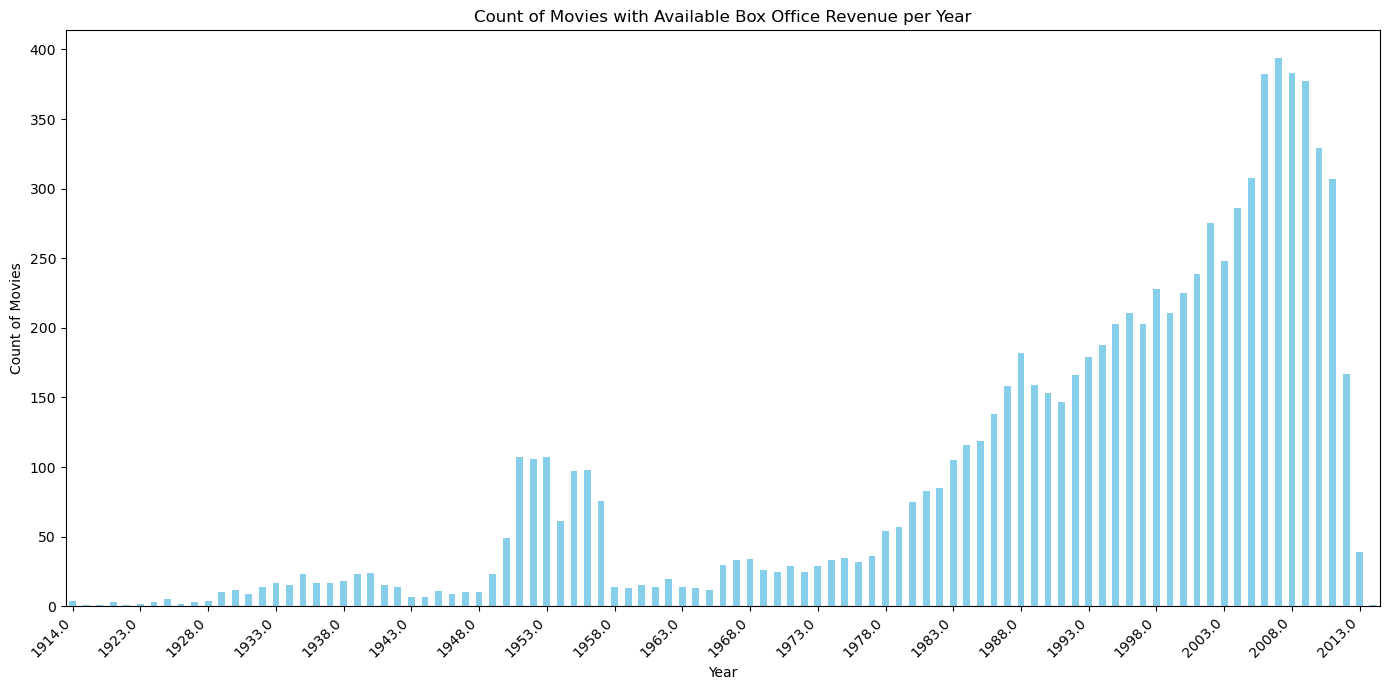

In [43]:
# Group by release year and count the movies with available revenue
revenue_counts_by_year = movies.groupby('movie_release_date').size()

# Plot the counts of movies with available box office revenue by year
plt.figure(figsize=(14, 7))
revenue_counts_by_year.plot(kind='bar', color='skyblue')

# Update x-axis for readability
plt.title('Count of Movies with Available Box Office Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate labels at a 45-degree angle for readability

# Optionally display fewer labels, e.g., every 5 years
plt.xticks(ticks=range(0, len(revenue_counts_by_year), 5), 
           labels=revenue_counts_by_year.index[::5])
plt.grid(False)
plt.tight_layout()
plt.show()  

A significant number of movies are produced after the years 1990.  

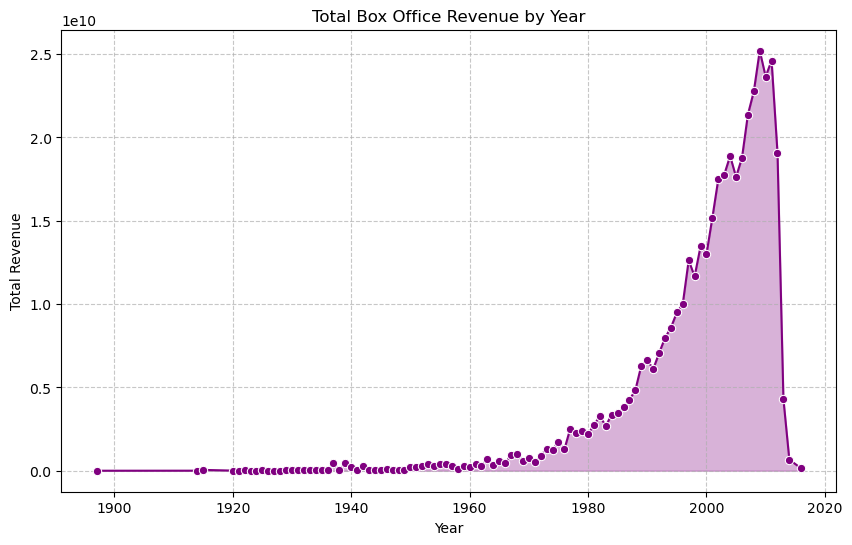

In [32]:
# Total Box Office Revenue by Year
revenue_by_year = movies.groupby('movie_release_date')['movie_box_office_revenue_x'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_by_year, x='movie_release_date', y='movie_box_office_revenue_x', marker='o', color='purple')
plt.fill_between(revenue_by_year['movie_release_date'], revenue_by_year['movie_box_office_revenue_x'], color='purple', alpha=0.3)
plt.title('Total Box Office Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Which countries are producing movies ?   

/var/folders/vn/57rl296d3kj3d3mdgckts32m0000gn/T/ipykernel_5033/1577935737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


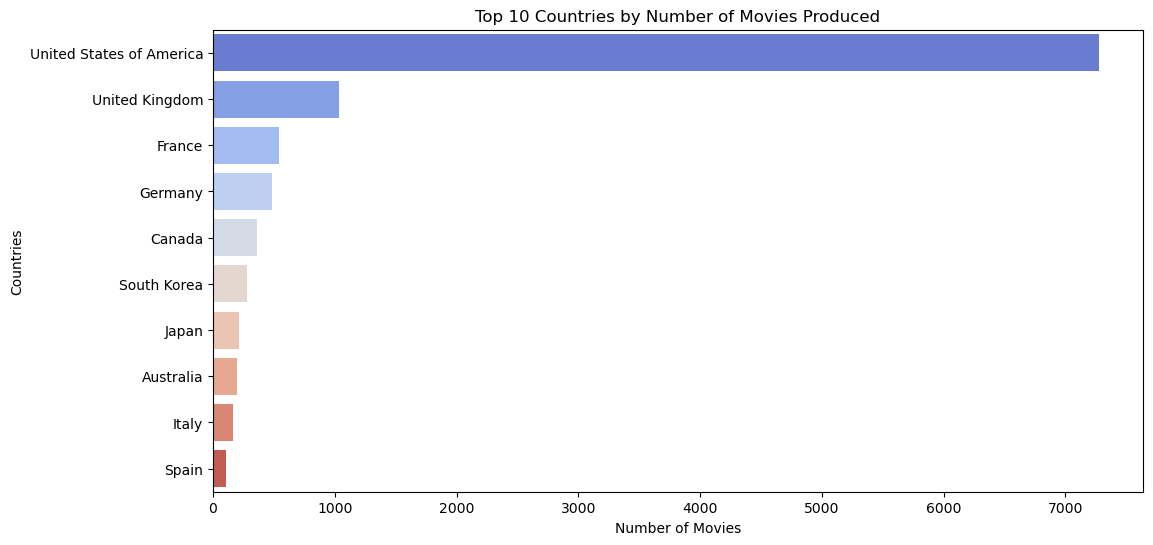

In [ ]:
# Ensure that the movie_countries column is parsed as lists
movies['movie_countries'] = movies['movie_countries'].apply(ast.literal_eval)

# Filter out rows with empty countries
movies = movies[movies['movie_countries'].map(len) > 0]

# Top 10 Countries by Number of Movies Produced
movies_countries_exploded = movies.explode('movie_countries')
top_countries = movies_countries_exploded['movie_countries'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Number of Movies Produced')
plt.xlabel('Number of Movies')
plt.ylabel('Countries')  
plt.grid(False)
plt.show()  

What is the distribution of langages in the movies ?  

<Figure size 1500x1000 with 0 Axes>

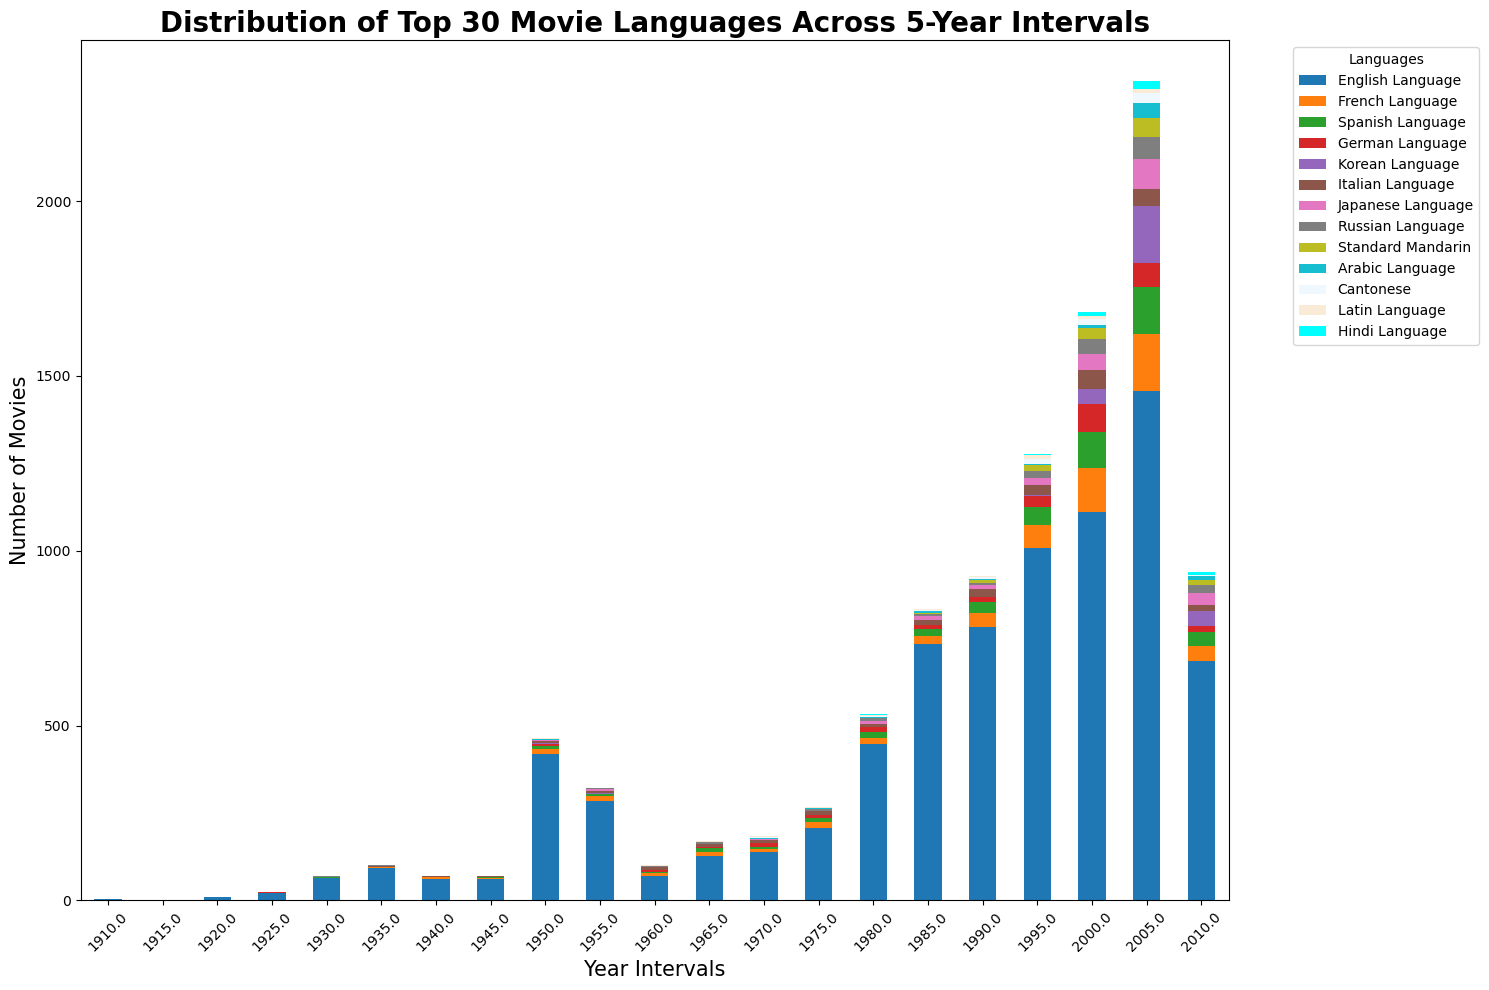

In [40]:
# Implement here a function just to correctly parse the lists in the 'movie_languages' column
def safe_literal_eval(val):
	try:
		return ast.literal_eval(val)
	except (ValueError, SyntaxError):
		return val

movies['movie_languages'] = movies['movie_languages'].apply(safe_literal_eval)

movies['year_interval'] = (movies['movie_release_date'] // 5) * 5  

movies_languages_exploded = movies.explode('movie_languages')

# Create pivot tables with the count of each genre and language per 5-year interval
language_year_pivot = movies_languages_exploded.pivot_table(index='year_interval', columns='movie_languages', aggfunc='size', fill_value=0)

language_counts = movies_languages_exploded['movie_languages'].value_counts()
valid_languages = language_counts[language_counts >= 50].index
language_year_pivot = language_year_pivot[valid_languages]  

# Define a custom colormap with 30 distinct colors
colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
custom_colormap = colors[:30]

# Plot the stacked bar plot for languages
plt.figure(figsize=(15, 10))
language_year_pivot.plot(kind='bar', stacked=True, color=custom_colormap, figsize=(15, 10))

# Add titles and labels
plt.title('Distribution of Top 30 Movie Languages Across 5-Year Intervals', fontsize=20, fontweight='bold')
plt.xlabel('Year Intervals', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

The English language is indeed the most used in movie industry.  

Some more statistical analyses on the dataset :  

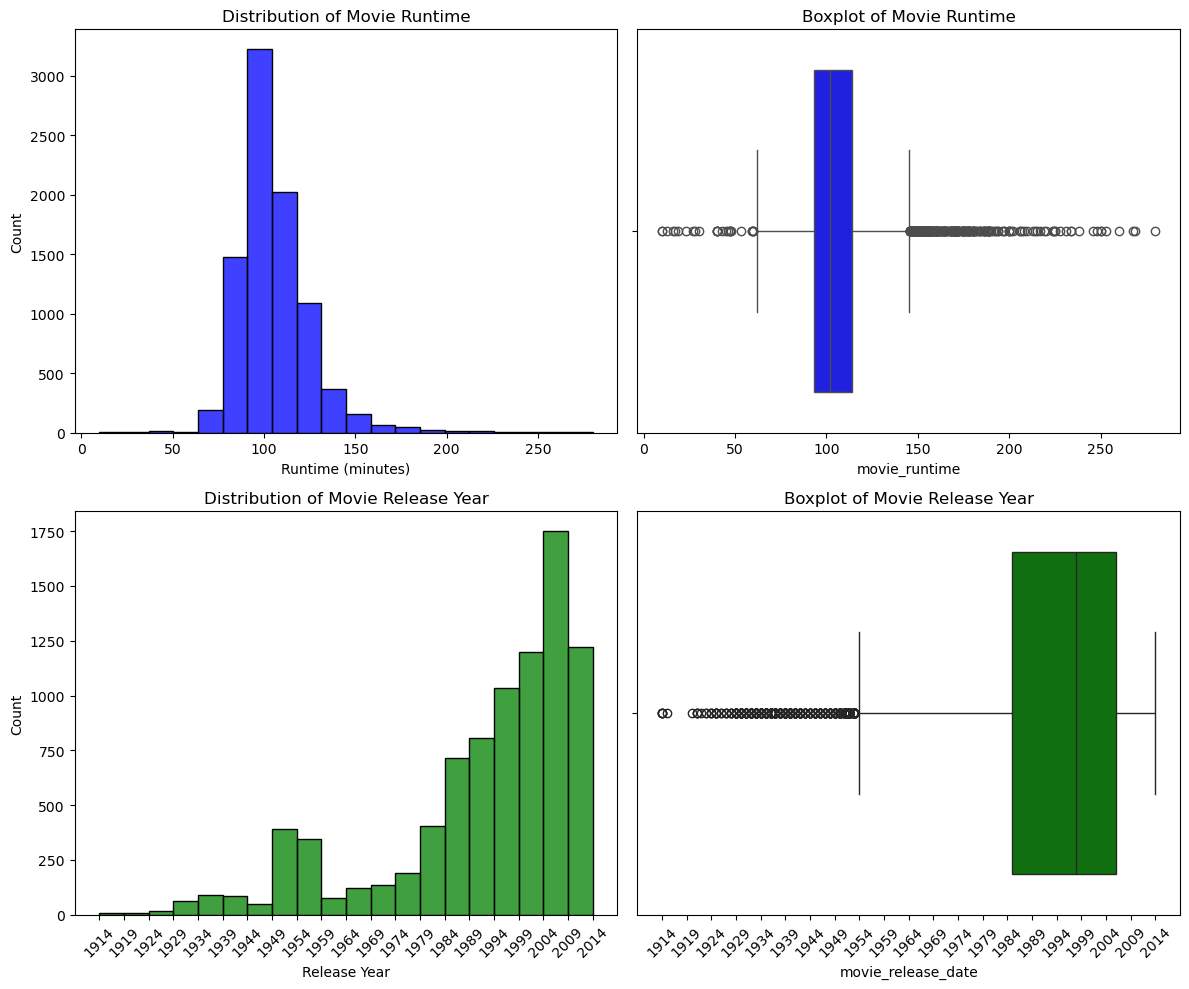

In [ ]:
# Create a figure with subplots (2x2 layout)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  

# Plot distribution of movie runtime (no KDE and fewer bins)
sns.histplot(movies[movies['movie_runtime'] < 300]['movie_runtime'].dropna(), kde=False, bins=20, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Movie Runtime')
axes[0, 0].set_xlabel('Runtime (minutes)')  
axes[0, 0].grid(False)  


# Boxplot for movie runtime
sns.boxplot(x=movies[movies['movie_runtime'] < 300]['movie_runtime'].dropna(), ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Boxplot of Movie Runtime')  
axes[0, 1].grid(False)


# Plot distribution of release year (no KDE and fewer bins)
sns.histplot(movies['movie_release_date'].dropna(), kde=False, bins=20, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distribution of Movie Release Year')
axes[1, 0].set_xlabel('Release Year')
axes[1, 0].set_xticks(np.arange(movies['movie_release_date'].min(), movies['movie_release_date'].max()+1, 5))
axes[1, 0].tick_params(axis='x', rotation=45)   
axes[1, 0].grid(False)


# Boxplot for movie release year
sns.boxplot(x=movies['movie_release_date'].dropna(), ax=axes[1, 1], color='green')
axes[1, 1].set_title('Boxplot of Movie Release Year')
axes[1, 1].set_xticks(np.arange(movies['movie_release_date'].min(), movies['movie_release_date'].max()+1, 5))
axes[1, 1].tick_params(axis='x', rotation=45)  
axes[1, 1].grid(False)


# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()

The United States of America are prominent in the production of movies, which is here logical, because the proprecessed dataset used is mainly based on american movies.  

**5. First analyses**

In [44]:
# à ajouter dans le preprocessing quand le scrapping IMDb est fini, pour ajouter des colonnes aux merged_movies et faire plus d'analyses  
def merge_additional_data(merged_movies):
    """
    Merges the merged_movies DataFrame with the additional IMDB data on wikipedia_movie_id.
    """
    # Load the new imdb_additional_movies_data_left_1.csv
    imdb_additional_movies = pd.read_csv('data/processed/imdb_additional_movies_data_left_1.csv')

    # Merge the two DataFrames on 'wikipedia_movie_id'
    merged_movies = pd.merge(merged_movies, imdb_additional_movies, on='wikipedia_movie_id', how='left')

    # Ensure there are no duplicates on 'wikipedia_movie_id'
    merged_movies = merged_movies.drop_duplicates(subset=['wikipedia_movie_id'])

    return merged_movies

What genre generates the most revenues ?  

/var/folders/vn/57rl296d3kj3d3mdgckts32m0000gn/T/ipykernel_5033/91613811.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='movie_box_office_revenue_x', y='movie_genres', data=revenue_by_genre.head(10), palette='viridis')


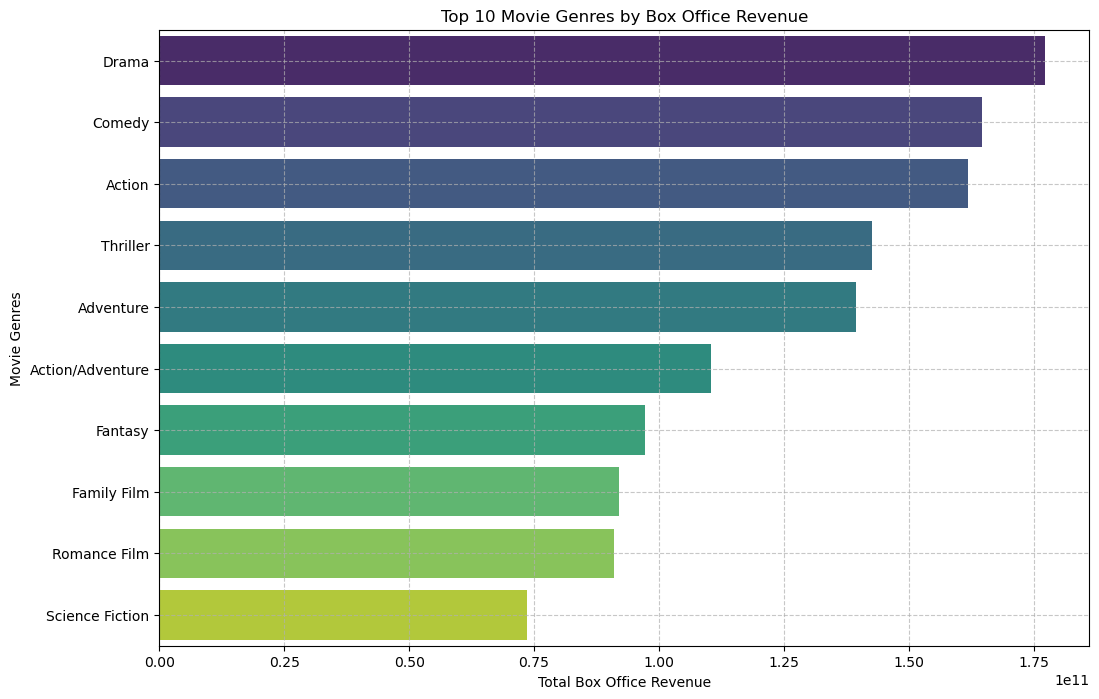

In [ ]:
merged_movies['movie_genres'] = merged_movies['movie_genres'].apply(eval)

# Explode the genres to have one genre per row
movies_genres_exploded = merged_movies.explode('movie_genres')

# Group by genre and sum the revenues
revenue_by_genre = movies_genres_exploded.groupby('movie_genres')['movie_box_office_revenue_x'].sum().reset_index()

# Sort by revenue in descending order
revenue_by_genre = revenue_by_genre.sort_values(by='movie_box_office_revenue_x', ascending=False)

# Plot the top 10 genres by revenue
plt.figure(figsize=(12, 8))
sns.barplot(x='movie_box_office_revenue_x', y='movie_genres', data=revenue_by_genre.head(10), palette='viridis')
plt.title('Top 10 Movie Genres by Box Office Revenue')
plt.xlabel('Total Box Office Revenue')
plt.ylabel('Movie Genres')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()  

**6. Summaries / Clustering / LLM**

**7. Régression linéaire**

Add analyses here based on budget / revenues / ratings when preprocessing and scraping is finished

**à enlever plus tard**

On vient d'ouvrir le fichier, explications préliminaires.  

Preprocessing, nommer les colonnes, missing values. Merge IMDb, Scraping. Régression linéaire. 

Donne à Anders, on le fait passer sur plot structure. Retirer les personnages principaux. Mettre qu'on n'a pas de 
résultats sur K-Means. Web scraping prend du temps.    

Anders extract les plot_structures. Merge tout ensemble. Trois thèmes : plot structure, box office revenue (sans inflation, avec inflation)
Relation budget, revenue, inflation. Commence à analyser pour les plot structures.  

Faire inflation après pre-processing.     

Premiers plots chill.    

Preprocessing.    

Analyse, plot basé sur ce qui est processed 